<a href="https://colab.research.google.com/github/briannaswan/Strengthening-social-contacts-and-care-for-older-adults-using-mixed-reality/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gspread
!pip install gspread_dataframe
!pip install google-auth google-auth-oauthlib google-auth-httplib2

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


In [2]:
sheet = gc.open('GENIAL Thesis Survey Responses').sheet1

In [3]:
import pandas as pd

# Work with the Google Sheet in this Colab notebook, by retrieving data from it into a pandas DataFrame using the get_all_values() method:
data = sheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])

# Create a dictionary of old and new column names
new_names = {"Timestamp":"timestamp",
             "Scenario Number": "scenario_number",
             "Strength: Time Recorded (MM:SS)": "strength_time_recorded",
             "Static Balance: Time Recorded (MM:SS)": "static_balance_time_recorded",
             "Static Balance: Number of cubes successfully moved LEFT to RIGHT": "static_balance_left_to_right",
             "Static Balance: Number of cubes successfully moved RIGHT to LEFT": "static_balance_right_to_left",
             "Dynamic Balance: Time Recorded (MM:SS)": "dynamic_balance_time_recorded",
             "Dynamic Balance: Number of cubes successfully placed on opposite table": "dynamic_balance_success_count",
             "What is your name?": "name",
             "What is your age?": "age_range",
             "What gender do you identify with?": "gender",
             "I certify that I do not have any mobility issues or impairments, balance issues or otherwise, and am healthy enough to partake in this evaluation.": "certify_health",
             "What is your experience with virtual reality headsets?": "vr_experience",
             "Do you have any experience seeing a physiotherapist or following an exercise regime given to you by a physiotherapist?": "physio_experience",
             "If you answered yes to the above question, please select from the following the types of appointments you have experienced:": "physio_appt_type",
             "If you have any experience with traditional or in-person physiotherapy appointments, what was the level of difficulty to complete the scenario in comparison?": "physio_difficulty",
             "If you were to start a physiotherapy regime, which type of physiotherapy appointments would you prefer?": "physio_preference",
             "Were any of the tasks difficult to do?": "tasks_difficulty",
             "The verbal instructions provided by the researcher were clear.": "verbal_instructions_clear",
             "The instructions on how to NAVIGATE in the application were clear,": "navigation_instructions_clear",
             "The instructions on how to START and STOP the timer were clear.": "timer_instructions_clear",
             "The instructions for PICKING UP CUBES were clear.": "cube_instructions_clear",
             "The written instructions for each task were clear.": "written_instructions_clear",
             "I could hear the researcher clearly while wearing the Oculus Quest 2 headset.": "hear_researcher_clear",
             "I felt SECURE in the virtual environment relative to my physical environment, I did not fear that I would fall or bump into my surroundings.": "secure_feeling",
             "I felt COMFORTABLE in the virtual environment relative to my physical environment.": "comfortable_feeling",
             "Did you experience any motion sickness?": "motion_sickness",
             "Did you notice any inconsistencies in the application's behavior, such with motion, teleportation, button selection, picking up cubes, etc.?": "inconsistencies",
             'If you answered "Yes" or "Some" to the above question, please elaborate:': "inconsistencies_elaborate",
             "Were you able to complete tasks without running into any issues?": "tasks_completed_no_issues",
             'If you answered "No" in the above question, please elaborate:': "tasks_issues",
             "Did you experience a crash or freeze during use of the application?": "crash_freeze",
             "Did you have any trouble with certain features of the application?": "features_trouble",
             "Did you experience any delays or slow performance when using the application?": "delays",
             "On a scale of one to ten, how would you rate the usability of this application?": "usability_rank",
             "Please provide any comments or feedback about the combined use of both the application and Microsoft Teams.": "microsoft_teams",
             "What sort of changes would you like to see implemented in the application?":"changes_feedback",
             "Is there any additional information you would like to share about your experience that you think may contribute to my research?":"additional_feedback"}

# rename the df
df = df.rename(columns=new_names)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   timestamp                      25 non-null     object
 1   scenario_number                25 non-null     object
 2   strength_time_recorded         25 non-null     object
 3   static_balance_time_recorded   25 non-null     object
 4   static_balance_left_to_right   25 non-null     object
 5   static_balance_right_to_left   25 non-null     object
 6   dynamic_balance_time_recorded  25 non-null     object
 7   dynamic_balance_success_count  25 non-null     object
 8   name                           25 non-null     object
 9   age_range                      25 non-null     object
 10  gender                         25 non-null     object
 11  certify_health                 25 non-null     object
 12  vr_experience                  25 non-null     object
 13  physio_

In [5]:
# Change the features to the appropriate type

# Change numeric data to dtype = int
df[
    ['static_balance_left_to_right',
     'static_balance_right_to_left',
     'dynamic_balance_success_count',
     'verbal_instructions_clear',
     'written_instructions_clear',
     'hear_researcher_clear',
     'navigation_instructions_clear',
     'timer_instructions_clear',
     'cube_instructions_clear',
     'secure_feeling',
     'comfortable_feeling',
     'usability_rank']
   ] = df[
      ['static_balance_left_to_right',
       'static_balance_right_to_left',
       'dynamic_balance_success_count',
       'verbal_instructions_clear',
       'written_instructions_clear',
       'hear_researcher_clear',
       'navigation_instructions_clear',
       'timer_instructions_clear',
       'cube_instructions_clear',
       'secure_feeling',
       'comfortable_feeling',
       'usability_rank'
    ]].astype('int')

# Change the categorical and ordinal features to dtype = category
df[
    ['scenario_number',
     'age_range',
     'gender',
     'certify_health',
     'vr_experience',
     'physio_experience',
     'physio_appt_type',
     'physio_difficulty',
     'physio_preference',
     'tasks_difficulty',
     'motion_sickness',
     'inconsistencies',
     'tasks_completed_no_issues',
     'tasks_issues',
     'crash_freeze',
     'features_trouble',
     'delays',
     'microsoft_teams',
     'changes_feedback',
     'additional_feedback']
   ] = df[
      ['scenario_number',
     'age_range',
     'gender',
     'certify_health',
     'vr_experience',
     'physio_experience',
     'physio_appt_type',
     'physio_difficulty',
     'physio_preference',
     'tasks_difficulty',
     'motion_sickness',
     'inconsistencies',
     'tasks_completed_no_issues',
     'tasks_issues',
     'crash_freeze',
     'features_trouble',
     'delays',
     'microsoft_teams',
     'changes_feedback',
     'additional_feedback'
     ]
  ].astype("category")

In [6]:
from pandas.api.types import CategoricalDtype

# Define ordered categories for multiple columns
age_cats = CategoricalDtype(categories=["18-24", "25-34", "35-44", "45-54", "55-60", "61-65", "66-70", "71-75", "76-80", "81+"], ordered=True)
vr_experience_cats = CategoricalDtype(categories=["This is my first time using a virtual reality headset.", "I have some recreational experience using virtual reality headsets.", "I regularly use virtual reality headsets recreationally.", "I have professional or educational experience using virtual reality headsets."], ordered=True)
motion_sickness_cats = CategoricalDtype(categories=["No", "Some", "Yes"], ordered=True)


# Convert columns to ordered categorical data types
df['age_range'] = pd.Categorical(df['age_range'], categories=age_cats.categories)
df['vr_experience'] = pd.Categorical(df['vr_experience'], categories=vr_experience_cats.categories)
df['motion_sickness'] = pd.Categorical(df['motion_sickness'], categories=motion_sickness_cats.categories)


In [7]:
def convert_time_to_seconds(time_string):
    # Split the time string into minutes and seconds
    minutes, seconds = time_string.split(':')

    # Convert the minutes and seconds to integers
    minutes = int(minutes)
    seconds = int(seconds)

    # Calculate the total number of seconds
    total_seconds = minutes * 60 + seconds

    return total_seconds


In [8]:
# Get times in seconds
# Apply the function to the 'time' columns
df['strength_time_recorded_seconds'] = df['strength_time_recorded'].apply(convert_time_to_seconds)
df['static_balance_time_recorded_seconds'] = df['static_balance_time_recorded'].apply(convert_time_to_seconds)
df['dynamic_balance_time_recorded_seconds'] = df['dynamic_balance_time_recorded'].apply(convert_time_to_seconds)

df['total_strength_time'] = df['strength_time_recorded_seconds']
df['total_static_time'] = df['static_balance_time_recorded_seconds'] - df['strength_time_recorded_seconds']
df['total_dynamic_time'] = df['dynamic_balance_time_recorded_seconds'] - df['static_balance_time_recorded_seconds']
df['total_elapsed_time'] = df['total_strength_time'] + df['total_static_time'] + df['total_dynamic_time']

df.head()

,timestamp,scenario_number,strength_time_recorded,static_balance_time_recorded,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_time_recorded,dynamic_balance_success_count,name,age_range,...,microsoft_teams,changes_feedback,additional_feedback,strength_time_recorded_seconds,static_balance_time_recorded_seconds,dynamic_balance_time_recorded_seconds,total_strength_time,total_static_time,total_dynamic_time,total_elapsed_time
0,4/26/2023 20:46:05,1,00:29,01:21,3,2,02:12,3,Charlotte Fisher,18-24,...,,- colour blind settings? -made into a room tha...,- it is slightly uncomfortable to use with gla...,29,81,132,29,52,51,132
1,4/27/2023 11:29:24,2,00:25,01:05,2,2,01:27,3,Marianna,18-24,...,I think that with the head set there are more ...,"Perhaps adjust the text instructions, as they ...",,25,65,87,25,40,22,87
2,4/27/2023 12:57:40,3,00:43,01:25,1,1,01:53,2,Zi-Quan You (Baron),18-24,...,The overall experience is great and fun. But ...,,,43,85,113,43,42,28,113
3,4/27/2023 13:46:39,4,00:23,01:18,3,3,01:43,2,andrew scholey,45-54,...,,no changes 10 out 10,absolutely blown away with experience,23,78,103,23,55,25,103
4,4/27/2023 14:13:03,5,00:36,02:22,3,3,03:06,3,Henry Ndu,25-34,...,it’s all perfect. The games are fun.,woulf be nice to have some audio with the task...,No other comments. Thanks,36,142,186,36,106,44,186


In [9]:
# drop the orginial recorded time columns
df = df.drop(columns=['timestamp','strength_time_recorded', 'static_balance_time_recorded','dynamic_balance_time_recorded' ])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   scenario_number                        25 non-null     category
 1   static_balance_left_to_right           25 non-null     int64   
 2   static_balance_right_to_left           25 non-null     int64   
 3   dynamic_balance_success_count          25 non-null     int64   
 4   name                                   25 non-null     object  
 5   age_range                              25 non-null     category
 6   gender                                 25 non-null     category
 7   certify_health                         25 non-null     category
 8   vr_experience                          25 non-null     category
 9   physio_experience                      25 non-null     category
 10  physio_appt_type                       25 non-null     category


In [10]:
# One participant was not able to complete the third task --> impute the median

import pandas as pd
import numpy as np

# Check if the 'total_dynamic_time' column has any zero values
mask = df['total_dynamic_time'] == 0

# Calculate the median value of the 'total_dynamic_time' column
median_value = np.median(df['total_dynamic_time'])

# Replace the zero values with the median
df.loc[mask, 'total_dynamic_time'] = median_value

# Print the updated dataset
print(df['total_dynamic_time'])


0      51
1      22
2      28
3      25
4      44
5     163
6     173
7      23
8      20
9      30
10     22
11     78
12     23
13     15
14     33
15     31
16     35
17     21
18     52
19     44
20     30
21     86
22    342
23     30
24     20
Name: total_dynamic_time, dtype: int64


In [11]:
df.describe()

,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count,verbal_instructions_clear,navigation_instructions_clear,timer_instructions_clear,cube_instructions_clear,written_instructions_clear,hear_researcher_clear,secure_feeling,comfortable_feeling,usability_rank,strength_time_recorded_seconds,static_balance_time_recorded_seconds,dynamic_balance_time_recorded_seconds,total_strength_time,total_static_time,total_dynamic_time,total_elapsed_time
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.00,25.00,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2.320000,2.040000,2.680000,6.720000,6.560000,6.680000,6.600000,6.32000,6.96,6.32,6.360000,8.680000,39.080000,108.760000,165.200000,39.080000,69.680000,57.640000,165.200000
std,0.852447,0.934523,0.627163,0.541603,0.768115,0.690411,0.707107,1.10755,0.20,0.90,0.907377,1.069268,33.757616,75.132816,140.167162,33.757616,59.181022,71.860907,140.167162
min,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,4.000000,3.00000,6.00,4.00,4.000000,6.000000,16.000000,48.000000,63.000000,16.000000,30.000000,15.000000,63.000000
25%,2.000000,2.000000,3.000000,7.000000,6.000000,7.000000,6.000000,6.00000,7.00,6.00,6.000000,8.000000,23.000000,65.000000,94.000000,23.000000,40.000000,23.000000,94.000000
50%,3.000000,2.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.00,7.00,7.000000,9.000000,29.000000,81.000000,113.000000,29.000000,51.000000,30.000000,113.000000
75%,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.00,7.00,7.000000,10.000000,46.000000,122.000000,179.000000,46.000000,78.000000,51.000000,179.000000
max,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.00,7.00,7.000000,10.000000,184.000000,360.000000,702.000000,184.000000,278.000000,342.000000,702.000000


In [12]:
# Find the mode for each of the categorical variables

import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
categorical_columns = df.select_dtypes(include=['object','category'])  # Select only the categorical columns

# Find the mode for each categorical column
categorical_modes = categorical_columns.mode().iloc[0]

# Print the mode for each categorical column
for column, mode in categorical_modes.iteritems():
    print(f"Mode of {column}: {mode}")


Mode of scenario_number: 1
Mode of name: Aimee
Mode of age_range: 25-34
Mode of gender: Male
Mode of certify_health: Agree
Mode of vr_experience: This is my first time using a virtual reality headset.
Mode of physio_experience: No
Mode of physio_appt_type: 
Mode of physio_difficulty: I do not have experience with traditional or in-person physiotherapy.
Mode of physio_preference: in-person appointments
Mode of tasks_difficulty: None of the tasks were difficult
Mode of motion_sickness: No
Mode of inconsistencies: No
Mode of inconsistencies_elaborate: 
Mode of tasks_completed_no_issues: Yes
Mode of tasks_issues: 
Mode of crash_freeze: No
Mode of features_trouble: I did not have any issues
Mode of delays: No
Mode of microsoft_teams: 
Mode of changes_feedback: 
Mode of additional_feedback: 


<ipython-input-12-6c27e2f9934e>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, mode in categorical_modes.iteritems():


In [13]:
print("Descriptive statistics regarding total times for each exercise, as well as total time overall: \n")
df_times = df[['total_strength_time', 'total_static_time', 'total_dynamic_time', 'total_elapsed_time']]
df_times.describe().round()

Descriptive statistics regarding total times for each exercise, as well as total time overall: 



,total_strength_time,total_static_time,total_dynamic_time,total_elapsed_time
count,25.0,25.0,25.0,25.0
mean,39.0,70.0,58.0,165.0
std,34.0,59.0,72.0,140.0
min,16.0,30.0,15.0,63.0
25%,23.0,40.0,23.0,94.0
50%,29.0,51.0,30.0,113.0
75%,46.0,78.0,51.0,179.0
max,184.0,278.0,342.0,702.0


In [14]:
print("Descriptive statistics regarding performance during each exercise: \n")
df_scores = df[['static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count']]
df_scores.describe().round()

Descriptive statistics regarding performance during each exercise: 



,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count
count,25.0,25.0,25.0
mean,2.0,2.0,3.0
std,1.0,1.0,1.0
min,0.0,0.0,1.0
25%,2.0,2.0,3.0
50%,3.0,2.0,3.0
75%,3.0,3.0,3.0
max,3.0,3.0,3.0


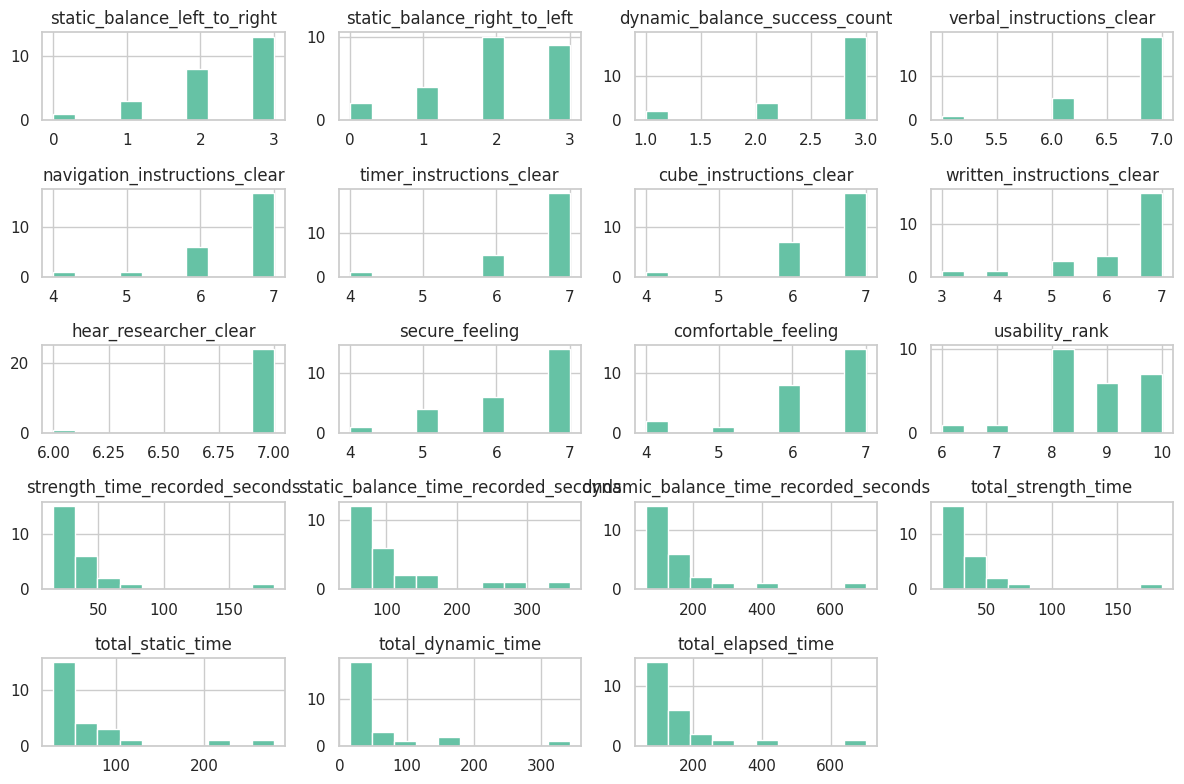

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_palette('Set2')

df.hist(figsize=(12,8), bins=10)

# Adjust the layout so the subplots don't overlap
plt.tight_layout()

plt.show()

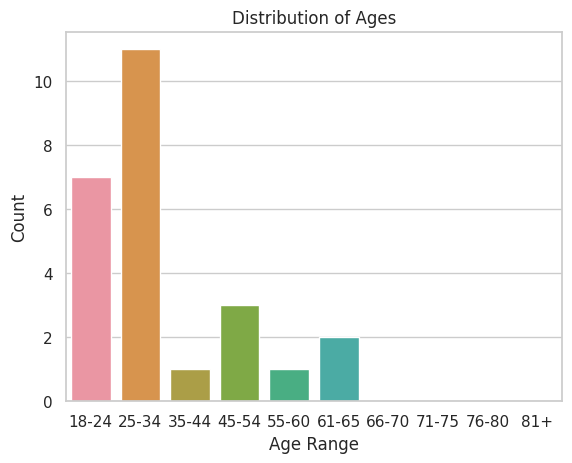

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style="darkgrid")

# Create a bar plot of age ranges
sns.countplot(x="age_range", data=df)

# Set the plot title and axis labels
plt.title("Distribution of Ages")
plt.xlabel("Age Range")
plt.ylabel("Count")

# Display the plot
plt.show()

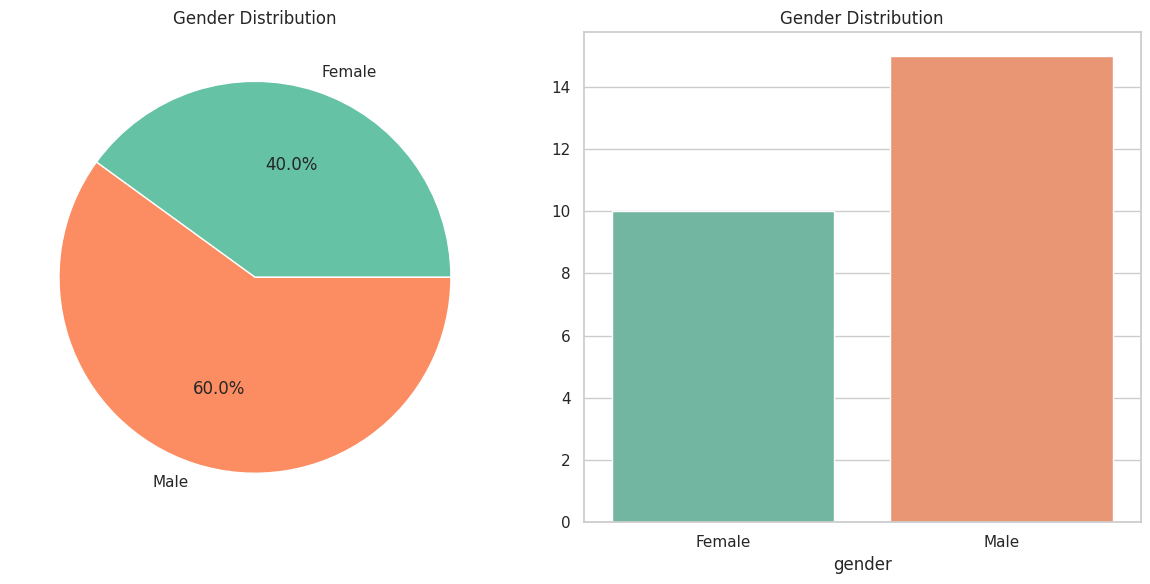

In [17]:
# Side-by-side gender charts
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the gender counts
gender_counts = df.groupby("gender").size()

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].set_title("Gender Distribution")
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Bar chart
axes[1].set_title("Gender Distribution")
sns.barplot(x=gender_counts.index, y=gender_counts, ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

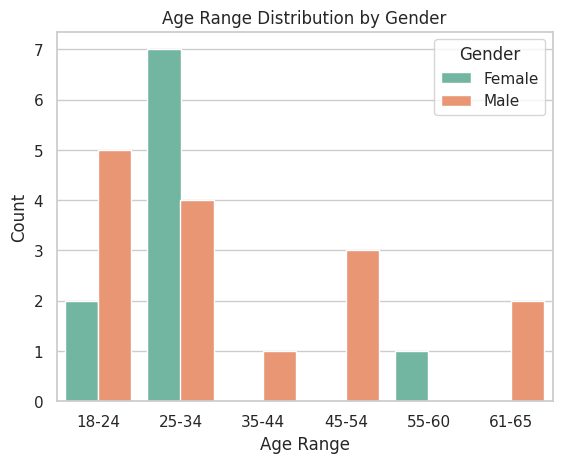

In [18]:
# Grouped bar plot of age range by gender
sns.countplot(data=df, x='age_range', hue='gender', order=['18-24', '25-34', '35-44', '45-54', '55-60', '61-65'])
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Range Distribution by Gender')
plt.legend(title='Gender')
plt.show()

In [19]:
grouped_gender_mean = df.groupby('gender').mean()
display(grouped_gender_mean)

<ipython-input-19-c42fc4e7e48d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_gender_mean = df.groupby('gender').mean()


,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count,verbal_instructions_clear,navigation_instructions_clear,timer_instructions_clear,cube_instructions_clear,written_instructions_clear,hear_researcher_clear,secure_feeling,comfortable_feeling,usability_rank,strength_time_recorded_seconds,static_balance_time_recorded_seconds,dynamic_balance_time_recorded_seconds,total_strength_time,total_static_time,total_dynamic_time,total_elapsed_time
gender,,,,,,,,,,,,,,,,,,,
Female,2.5,2.000000,2.900000,6.800000,6.600000,6.900000,6.700000,6.100000,7.000000,6.300000,6.400000,8.8,30.000000,74.600000,112.900000,30.000000,44.6,38.300000,112.900000
Male,2.2,2.066667,2.533333,6.666667,6.533333,6.533333,6.533333,6.466667,6.933333,6.333333,6.333333,8.6,45.133333,131.533333,200.066667,45.133333,86.4,70.533333,200.066667


In [20]:
# Define a dictionary to map ordinal / binary data to numeric values
age_range_dict = {'18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-60': 5, '61-65': 6, '66-70': 7, '71-75': 8, '76-80': 9, '81+': 10}
vr_experience_dict = {"This is my first time using a virtual reality headset.":0, "I have some recreational experience using virtual reality headsets.":1, "I regularly use virtual reality headsets recreationally.":2, "I have professional or educational experience using virtual reality headsets.":3}
motion_sickness_dict = {'No':0, 'Some':1, 'Yes':2}
inconsistencies_dict = {'No':0, 'Some':1, 'Yes':2}
tasks_completed_dict = {'No':0, 'Yes':1}
crash_freeze_dict = {'No':0, 'Yes':1}
delays_dict = {'No':0, 'Yes':1}

# map gender to a dummy variable
gender_dict = {'Female': 1, 'Male':0}

# Map the columns to a numeric variable using the dictionary
df['age_range_numeric'] = df['age_range'].map(age_range_dict)
df['age_range_numeric'] = df['age_range_numeric'].astype('int')

df['vr_experience_numeric'] = df['vr_experience'].map(vr_experience_dict)
df['vr_experience_numeric'] = df['vr_experience_numeric'].astype('int')

df['motion_sickness_numeric'] = df['motion_sickness'].map(motion_sickness_dict)
df['motion_sickness_numeric'] = df['motion_sickness_numeric'].astype('int')

df['inconsistencies_numeric'] = df['inconsistencies'].map(inconsistencies_dict)
df['inconsistencies_numeric'] = df['inconsistencies_numeric'].astype('int')

df['tasks_completed_no_issues_numeric'] = df['tasks_completed_no_issues'].map(tasks_completed_dict)
df['tasks_completed_no_issues_numeric'] = df['tasks_completed_no_issues_numeric'].astype('int')

df['crash_freeze_numeric'] = df['crash_freeze'].map(crash_freeze_dict)
df['crash_freeze_numeric'] = df['crash_freeze_numeric'].astype('int')

df['delays_numeric'] = df['delays'].map(delays_dict)
df['delays_numeric'] = df['delays_numeric'].astype('int')

df['gender_dummy'] = df['gender'].map(gender_dict)
df['gender_dummy'] = df['gender_dummy'].astype('int')

grouped_gender_median = df.groupby('gender').median()
display(grouped_gender_median)

print('Updated df (with numeric re-codes) medians')
display(df.median(numeric_only = True))

<ipython-input-20-4fe6ee98cf3d>:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_gender_median = df.groupby('gender').median()


,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count,verbal_instructions_clear,navigation_instructions_clear,timer_instructions_clear,cube_instructions_clear,written_instructions_clear,hear_researcher_clear,secure_feeling,...,total_dynamic_time,total_elapsed_time,age_range_numeric,vr_experience_numeric,motion_sickness_numeric,inconsistencies_numeric,tasks_completed_no_issues_numeric,crash_freeze_numeric,delays_numeric,gender_dummy
gender,,,,,,,,,,,,,,,,,,,,,
Female,3.0,2.0,3.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,34.0,99.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Male,2.0,2.0,3.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,30.0,117.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Updated df (with numeric re-codes) medians


static_balance_left_to_right               3.0
static_balance_right_to_left               2.0
dynamic_balance_success_count              3.0
verbal_instructions_clear                  7.0
navigation_instructions_clear              7.0
timer_instructions_clear                   7.0
cube_instructions_clear                    7.0
written_instructions_clear                 7.0
hear_researcher_clear                      7.0
secure_feeling                             7.0
comfortable_feeling                        7.0
usability_rank                             9.0
strength_time_recorded_seconds            29.0
static_balance_time_recorded_seconds      81.0
dynamic_balance_time_recorded_seconds    113.0
total_strength_time                       29.0
total_static_time                         51.0
total_dynamic_time                        30.0
total_elapsed_time                       113.0
age_range_numeric                          2.0
vr_experience_numeric                      0.0
motion_sickne

In [21]:
gender_grouped = df.groupby('gender')
summary_stats = gender_grouped.describe()
summary_stats


static_balance_left_to_right                                          \
                              count mean       std  min  25%  50%  75%  max   
gender                                                                        
Female                         10.0  2.5  0.707107  1.0  2.0  3.0  3.0  3.0   
Male                           15.0  2.2  0.941124  0.0  2.0  2.0  3.0  3.0   

       static_balance_right_to_left            ... delays_numeric       \
                              count      mean  ...            75%  max   
gender                                         ...                       
Female                         10.0  2.000000  ...            0.0  0.0   
Male                           15.0  2.066667  ...            0.0  1.0   

       gender_dummy                                     
              count mean  std  min  25%  50%  75%  max  
gender                                                  
Female         10.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Male           15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 216 columns]

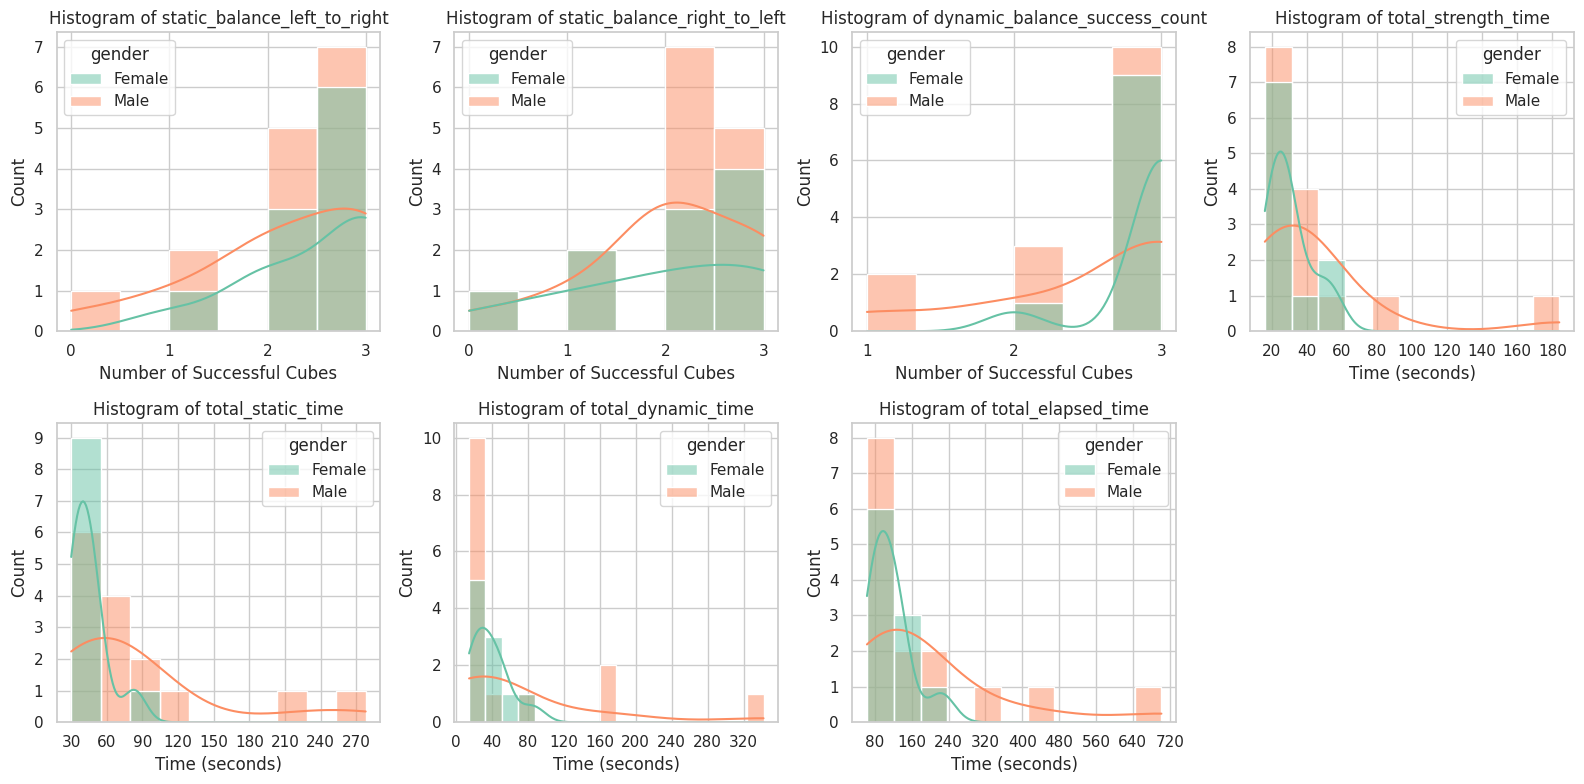

In [22]:
# Histograms separated by gender

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Set the style
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Set the colors
colors = {'Female':'green', 'Male':'orange'}

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust the figsize as per your preference

# Iterate over the columns you want to plot
columns_to_plot = ['static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count', 'total_strength_time', 'total_static_time', 'total_dynamic_time', 'total_elapsed_time']
ax_titles  = ['Number of Successful Cubes', 'Number of Successful Cubes', 'Number of Successful Cubes', 'Time (seconds)', 'Time (seconds)', "Time (seconds)", "Time (seconds)"]

for i, column in enumerate(columns_to_plot):
    # Get the current axis
    ax = axes[i // 4, i % 4]

    # To make sure the axes only have whole numbers (int)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Create separate bar charts for each gender
    #sns.histplot(data=df, x=column, hue='gender', palette=colors, kde=False, ax=ax)
    sns.histplot(data=df, x=column, hue='gender', kde=True, ax=ax)


    # Set labels and title for each subplot
    ax.set_xlabel(ax_titles[i])
    #ax.set_xticks(range([i]))
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column}')

if len(columns_to_plot) < 8:
  fig.delaxes(axes[1,3])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

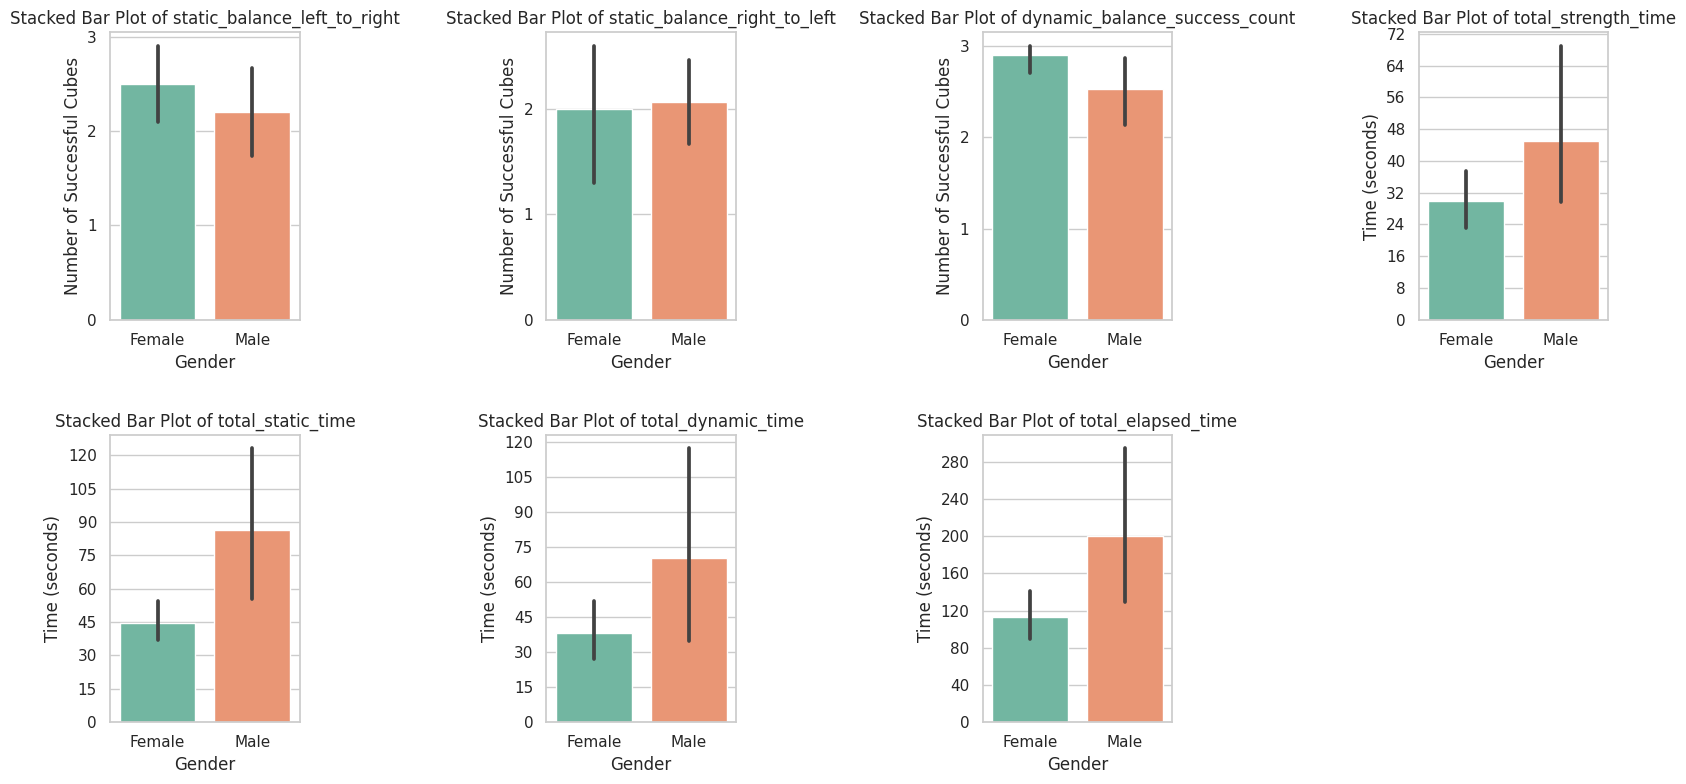

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the style
sns.set_style('whitegrid')

# Set the colors
#colors = {'Female':'pink', 'Male':'blue'}
sns.set_palette("Set2")  # Optional: Set a custom color palette

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust the figsize as per your preference

# Iterate over the columns you want to plot
columns_to_plot = ['static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count', 'total_strength_time', 'total_static_time', 'total_dynamic_time', 'total_elapsed_time']
ax_titles  = ['Number of Successful Cubes', 'Number of Successful Cubes', 'Number of Successful Cubes', 'Time (seconds)', 'Time (seconds)', "Time (seconds)", "Time (seconds)"]

for i, column in enumerate(columns_to_plot):
    # Get the current axis
    ax = axes[i // 4, i % 4]

    # To make sure the axes only have whole numbers (int)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Create stacked bar plots for each gender
    sns.barplot(data=df, x='gender', y=column, ax=ax)
   # sns.barplot(data=df, x='gender', y=column, palette=colors, ax=ax) # If setting custom colours for each category

    # Set labels and title for each subplot
    ax.set_xlabel('Gender')
    ax.set_ylabel(ax_titles[i])
    ax.set_title(f'Stacked Bar Plot of {column}')

if len(columns_to_plot) < 8:
  fig.delaxes(axes[1,3])

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=1.3, hspace=0.4)  # Adjust the values as per your preference


# Show the plot
plt.show()


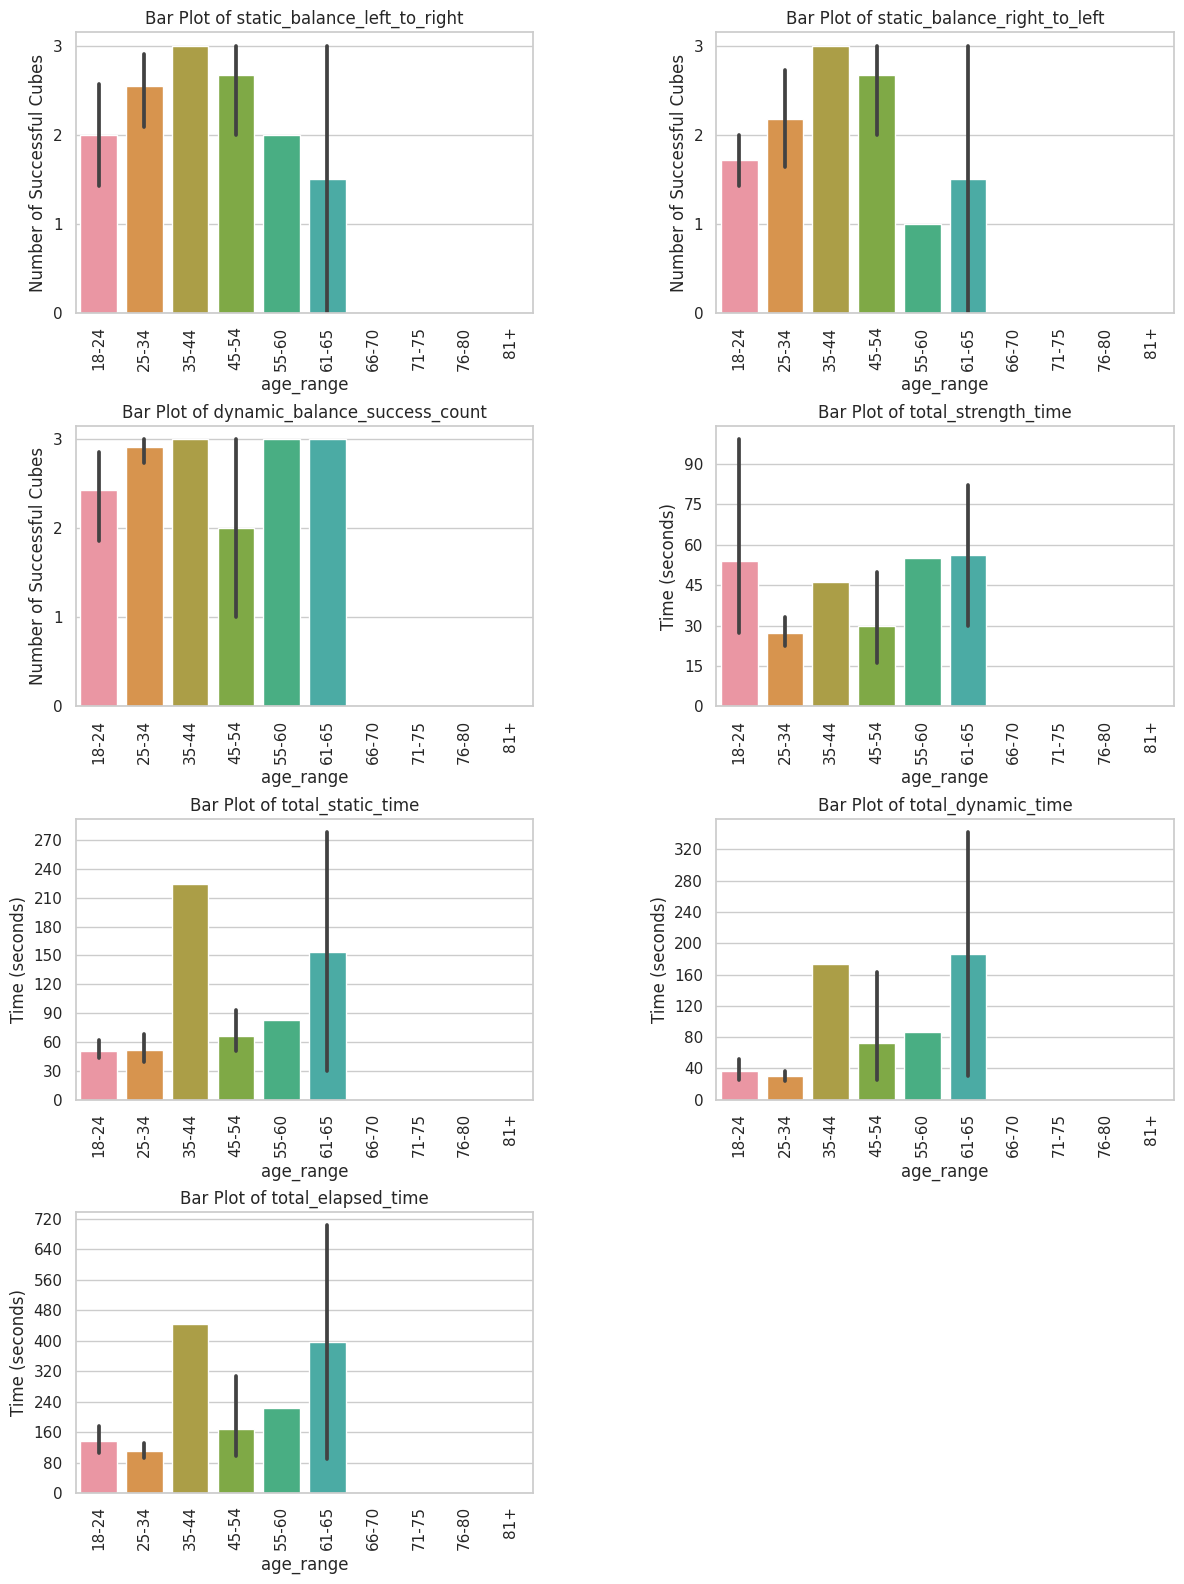

In [44]:
# Create stacked bar plots to show score distribution between age ranges

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the style
sns.set_style('whitegrid')

# Set the colors
sns.set_palette("Set2")  # Optional: Set a custom color palette

# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Adjust the figsize as per your preference

# Iterate over the columns you want to plot
columns_to_plot = ['static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count', 'total_strength_time', 'total_static_time', 'total_dynamic_time', 'total_elapsed_time']
ax_titles  = ['Number of Successful Cubes', 'Number of Successful Cubes', 'Number of Successful Cubes', 'Time (seconds)', 'Time (seconds)', "Time (seconds)", "Time (seconds)"]

# Create plot titles for each

for i, column in enumerate(columns_to_plot):
    # Get the current axis
    ax = axes[i // 2, i % 2]

    # To make sure the axes only have whole numbers (int)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Create stacked bar plots for each gender
    sns.barplot(data=df, x='age_range', y=column, ax=ax)
   # sns.barplot(data=df, x='gender', y=column, palette=colors, ax=ax) # If setting custom colours for each category

    # Set labels and title for each subplot
    ax.set_xlabel('age_range')
    ax.set_ylabel(ax_titles[i])
    ax.set_title(f'Bar Plot of {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

if len(columns_to_plot) < 8:
  fig.delaxes(axes[3,1])

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the values as per your preference


# Show the plot
plt.show()


In [45]:
df.groupby('age_range').size()

age_range
18-24     7
25-34    11
35-44     1
45-54     3
55-60     1
61-65     2
66-70     0
71-75     0
76-80     0
81+       0
dtype: int64

In [46]:
print("Examining the data grouped by age range:")
grouped_age_median = df.groupby('age_range').median(numeric_only=True)

med_grouped_age_scores = grouped_age_median[['total_strength_time', 'total_static_time', 'total_dynamic_time','total_elapsed_time','static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count']]
med_grouped_age_scores

Examining the data grouped by age range:


,total_strength_time,total_static_time,total_dynamic_time,total_elapsed_time,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count
age_range,,,,,,,
18-24,31.0,52.0,30.0,117.0,2.0,2.0,3.0
25-34,26.0,41.0,23.0,104.0,3.0,2.0,3.0
35-44,46.0,224.0,173.0,443.0,3.0,3.0,3.0
45-54,23.0,55.0,31.0,103.0,3.0,3.0,2.0
55-60,55.0,83.0,86.0,224.0,2.0,1.0,3.0
61-65,56.0,154.0,186.0,396.0,1.5,1.5,3.0
66-70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71-75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
print("Examining the data grouped by gender:")
grouped_gender_median = df.groupby('gender').median(numeric_only=True)

med_gender_scores = grouped_gender_median[['total_strength_time', 'total_static_time', 'total_dynamic_time','total_elapsed_time','static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count']]
med_gender_scores

Examining the data grouped by gender:


,total_strength_time,total_static_time,total_dynamic_time,total_elapsed_time,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count
gender,,,,,,,
Female,27.0,40.5,34.0,99.0,3.0,2.0,3.0
Male,31.0,55.0,30.0,117.0,2.0,2.0,3.0


In [48]:
import numpy as np
# Looking at min, max, and range by age
grouped_age = df.groupby('age_range')

# Define the columns and corresponding aggregation functions
aggregations = {
    'total_strength_time': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan],
    'total_static_time': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan],
    'total_dynamic_time': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan],
    'total_elapsed_time': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan],
    'static_balance_left_to_right': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan],
    'static_balance_right_to_left': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan],
    'dynamic_balance_success_count': ['min', 'max', lambda x: max(x) - min(x) if len(x) > 0 else np.nan]
}

# Calculate the statistics for each age_range
result_age_scores = grouped_age.agg(aggregations)

# Flatten the multi-level column index
result_age_scores.columns = [f"{col[0]}_{col[1]}" for col in result_age_scores.columns]

# Print the resulting DataFrame
display(result_age_scores)


,total_strength_time_min,total_strength_time_max,total_strength_time_<lambda_0>,total_static_time_min,total_static_time_max,total_static_time_<lambda_0>,total_dynamic_time_min,total_dynamic_time_max,total_dynamic_time_<lambda_0>,total_elapsed_time_min,...,total_elapsed_time_<lambda_0>,static_balance_left_to_right_min,static_balance_left_to_right_max,static_balance_left_to_right_<lambda_0>,static_balance_right_to_left_min,static_balance_right_to_left_max,static_balance_right_to_left_<lambda_0>,dynamic_balance_success_count_min,dynamic_balance_success_count_max,dynamic_balance_success_count_<lambda_0>
age_range,,,,,,,,,,,,,,,,,,,,,
18-24,19.0,184.0,165.0,38.0,78.0,40.0,20.0,78.0,58.0,87.0,...,149.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0
25-34,16.0,47.0,31.0,30.0,106.0,76.0,15.0,52.0,37.0,63.0,...,123.0,1.0,3.0,2.0,0.0,3.0,3.0,2.0,3.0,1.0
35-44,46.0,46.0,0.0,224.0,224.0,0.0,173.0,173.0,0.0,443.0,...,0.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,3.0,0.0
45-54,16.0,50.0,34.0,51.0,93.0,42.0,25.0,163.0,138.0,98.0,...,208.0,2.0,3.0,1.0,2.0,3.0,1.0,1.0,3.0,2.0
55-60,55.0,55.0,0.0,83.0,83.0,0.0,86.0,86.0,0.0,224.0,...,0.0,2.0,2.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0
61-65,30.0,82.0,52.0,30.0,278.0,248.0,30.0,342.0,312.0,90.0,...,612.0,0.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,0.0
66-70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71-75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


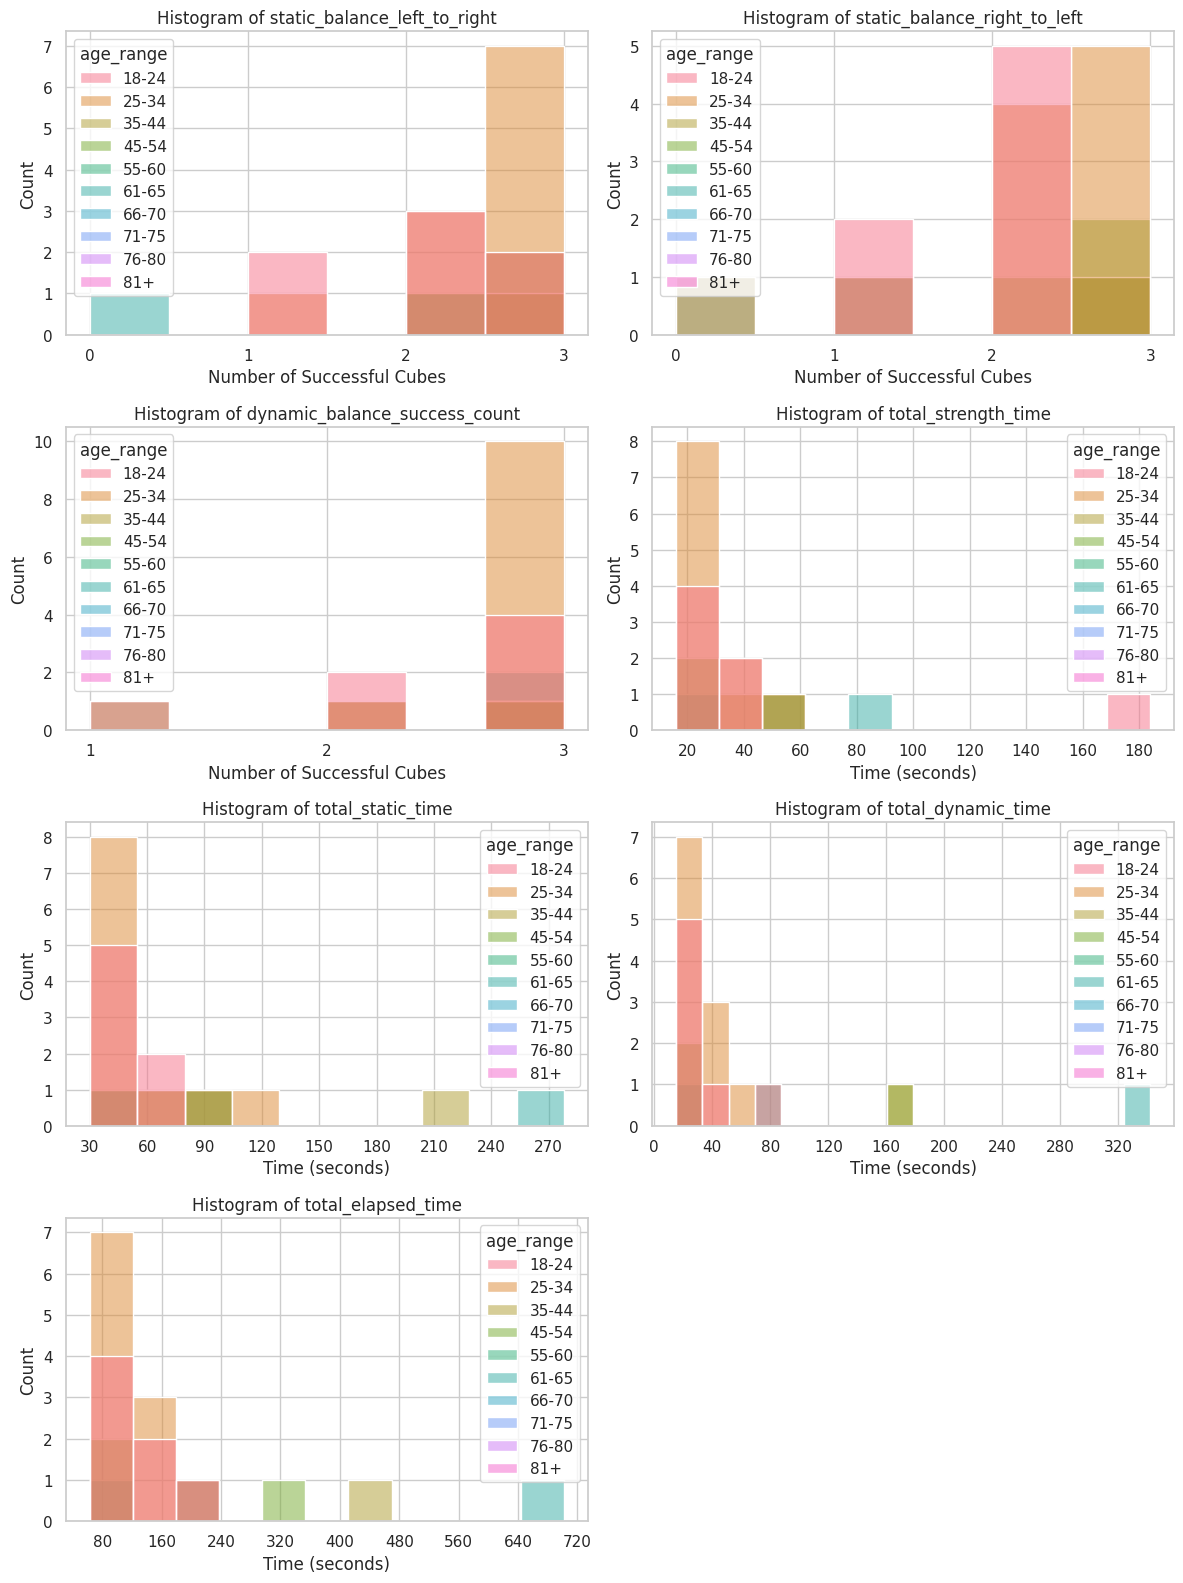

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the style
sns.set_style('whitegrid')

# Define custom colors for each gender
#colors = {'Female': 'orange', 'Male': 'blue'}  # Replace with your desired colors

# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Adjust the figsize as per your preference

# Iterate over the columns you want to plot
columns_to_plot = ['static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count', 'total_strength_time', 'total_static_time', 'total_dynamic_time', 'total_elapsed_time']
for i, column in enumerate(columns_to_plot):
    # Get the current axis
    ax = axes[i // 2, i % 2]

    # To make sure the axes only have whole numbers (int)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Create separate bar charts for each gender with custom colors
    sns.histplot(data=df, x=column, hue='age_range', kde=False, ax=ax, legend=True)


    # Set labels and title for each subplot
    ax.set_xlabel(ax_titles[i])
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column}')

if len(columns_to_plot) < 8:
  fig.delaxes(axes[3,1])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
df['age_range_numeric'].median()

2.0

<ipython-input-51-9a4b124b9e14>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


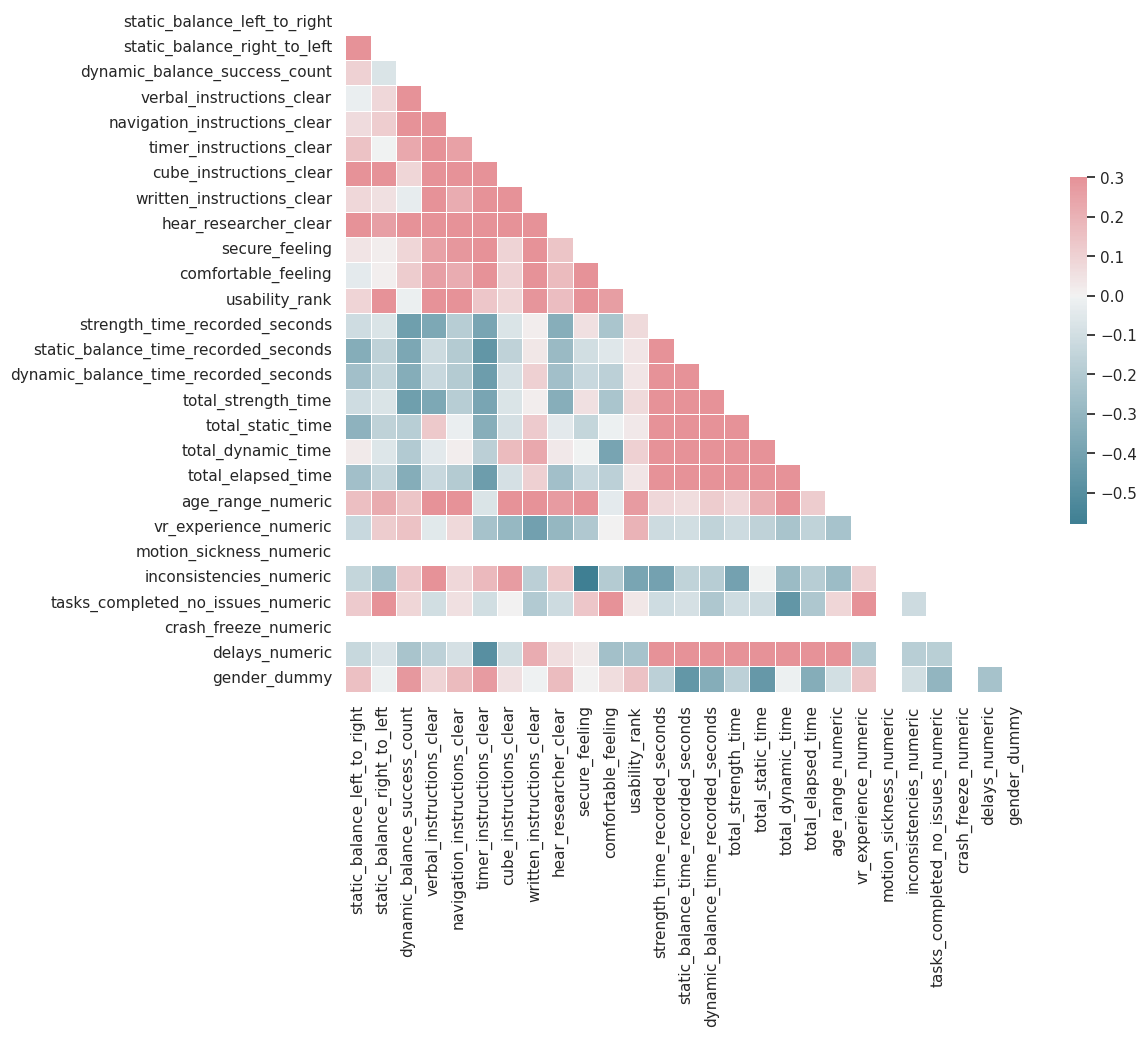

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a subset of the dataframe with only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
corr_matrix = df_numeric.corr(method="spearman")

# Create a correlation heatmap
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


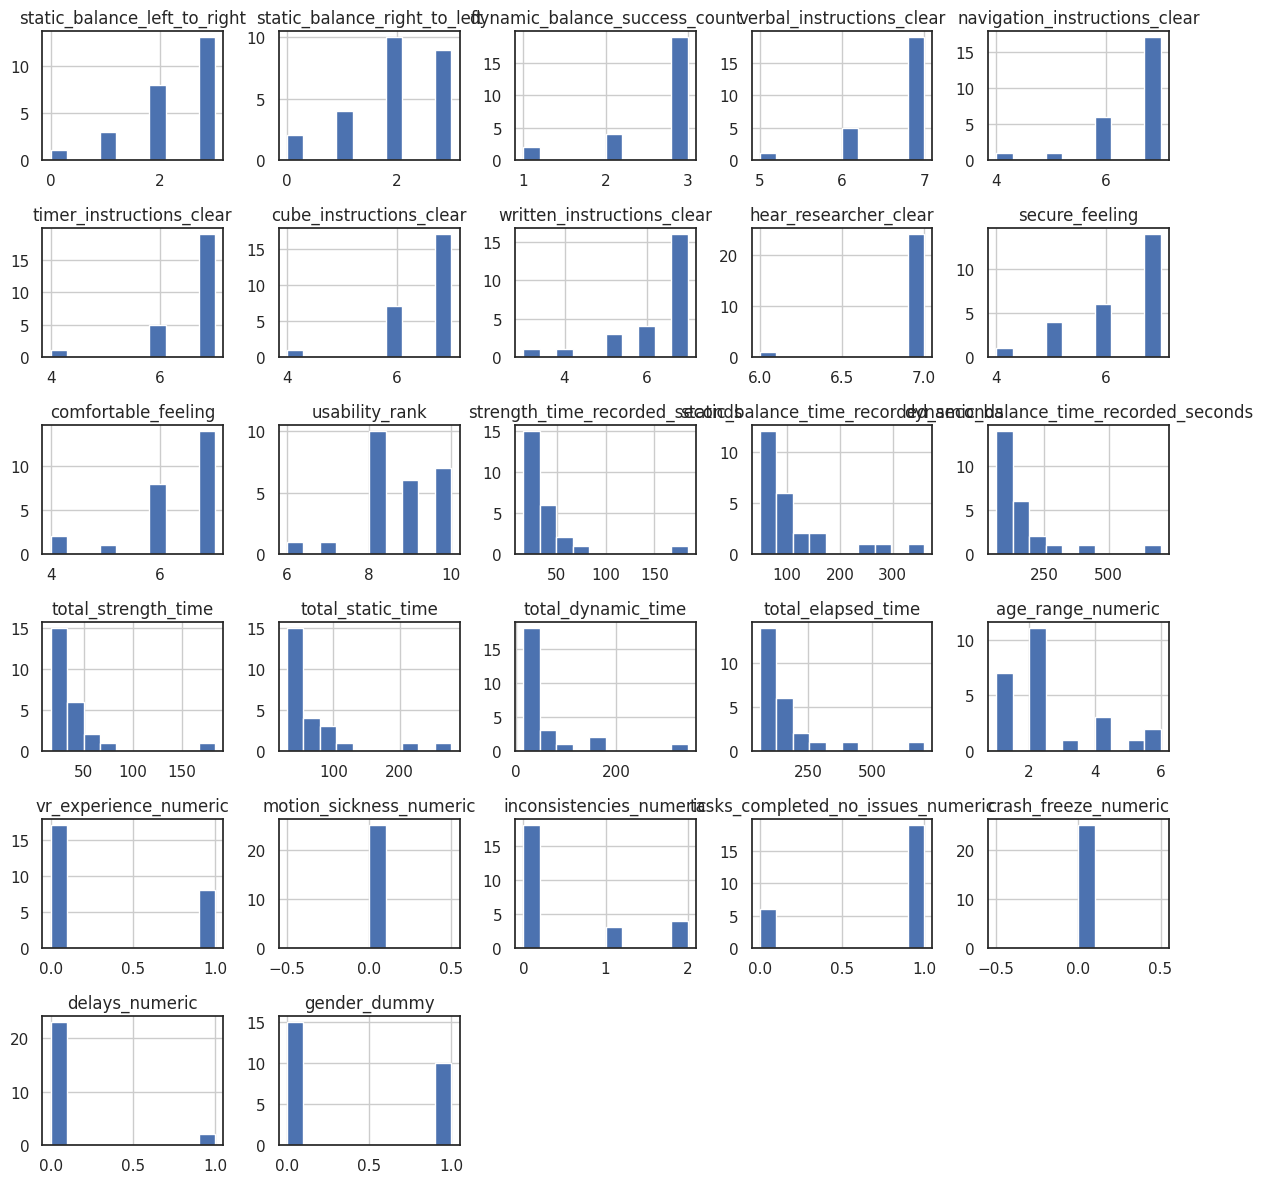

In [52]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,12), bins=10)

# Adjust the layout so the subplots don't overlap
plt.tight_layout()

plt.show()

In [53]:
import pandas as pd
from scipy.stats import spearmanr

# Create a new dataframe with only the variables you want to correlate
#cor_df = df[['age_range_numeric', 'gender_dummy', 'static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count']]

# Calculate Spearman's correlation coefficients and p-values
# corr, p_val = spearmanr(cor_df)
corr, p_val = spearmanr(df) # let's check the complete df

# Create a new dataframe to store the correlation coefficients and p-values
#corr_df = pd.DataFrame(corr, columns=cor_df.columns, index=cor_df.columns)
corr_df = pd.DataFrame(corr, columns=df.columns, index=df.columns)
#p_val_df = pd.DataFrame(p_val, columns=cor_df.columns, index=cor_df.columns)
p_val_df = pd.DataFrame(p_val, columns=df.columns, index=df.columns)

# Print the correlation dataframe
print("Correlation Coefficients:")
print(corr_df)

# Print the p-value dataframe
print("\nP-values:")
display(p_val_df)


Correlation Coefficients:
                                       scenario_number  \
scenario_number                               1.000000   
static_balance_left_to_right                  0.112135   
static_balance_right_to_left                  0.212051   
dynamic_balance_success_count                -0.017517   
name                                          0.179231   
age_range                                     0.305032   
gender                                        0.543493   
certify_health                                     NaN   
vr_experience                                 0.202152   
physio_experience                            -0.396297   
physio_appt_type                             -0.375960   
physio_difficulty                            -0.402097   
physio_preference                             0.419009   
tasks_difficulty                             -0.102399   
verbal_instructions_clear                     0.244969   
navigation_instructions_clear                 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,scenario_number,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count,name,age_range,gender,certify_health,vr_experience,physio_experience,...,total_dynamic_time,total_elapsed_time,age_range_numeric,vr_experience_numeric,motion_sickness_numeric,inconsistencies_numeric,tasks_completed_no_issues_numeric,crash_freeze_numeric,delays_numeric,gender_dummy
scenario_number,0.000000,0.593577,0.308866,0.933767,0.391308,0.138161,0.004986,NaN,0.332512,4.985680e-02,...,8.220566e-01,2.501208e-01,0.138161,0.332512,NaN,6.031846e-01,7.393689e-02,NaN,0.237142,0.004986
static_balance_left_to_right,0.593577,0.000000,0.000005,0.640012,0.943984,0.452790,0.457318,NaN,0.533064,4.573183e-01,...,9.167248e-01,2.218094e-01,0.452790,0.533064,NaN,4.847354e-01,5.630224e-01,NaN,0.520056,0.457318
static_balance_right_to_left,0.308866,0.000005,0.000000,0.748194,0.500282,0.281050,0.954495,NaN,0.567745,9.091272e-01,...,7.640034e-01,4.779299e-01,0.281050,0.567745,NaN,2.528850e-01,7.227915e-02,NaN,0.717974,0.954495
dynamic_balance_success_count,0.933767,0.640012,0.748194,0.000000,0.315631,0.500515,0.174268,NaN,0.470262,5.882226e-01,...,3.379176e-01,9.304275e-02,0.500515,0.470262,NaN,5.274198e-01,6.792648e-01,NaN,0.262756,0.174268
name,0.391308,0.943984,0.500282,0.315631,0.000000,0.109633,0.449157,NaN,0.533137,8.719419e-01,...,1.178318e-01,3.028180e-01,0.109633,0.533137,NaN,7.704393e-01,7.393689e-02,NaN,0.770845,0.449157
age_range,0.138161,0.452790,0.281050,0.500515,0.109633,0.000000,0.648341,NaN,0.249428,5.110306e-01,...,9.404255e-02,5.672324e-01,0.000000,0.249428,NaN,1.898955e-01,6.708901e-01,NaN,0.035534,0.648341
gender,0.004986,0.457318,0.954495,0.174268,0.449157,0.648341,0.000000,NaN,0.504391,4.258794e-01,...,9.570947e-01,9.080979e-02,0.648341,0.504391,NaN,6.326465e-01,1.370021e-01,NaN,0.246301,0.000000
certify_health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vr_experience,0.332512,0.533064,0.567745,0.470262,0.533137,0.249428,0.504391,NaN,0.000000,8.680591e-01,...,2.639521e-01,4.605395e-01,0.249428,0.000000,NaN,6.155704e-01,5.702724e-02,NaN,0.332178,0.504391
physio_experience,0.049857,0.457318,0.909127,0.588223,0.871942,0.511031,0.425879,NaN,0.868059,0.000000e+00,...,7.262144e-01,1.530697e-01,0.511031,0.868059,NaN,3.353138e-01,5.850770e-01,NaN,0.246301,0.425879


Correlation Coefficients:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,scenario_number,static_balance_left_to_right,static_balance_right_to_left,dynamic_balance_success_count,age_range,gender,certify_health,vr_experience,physio_experience,physio_appt_type,...,total_dynamic_time,total_elapsed_time,age_range_numeric,vr_experience_numeric,motion_sickness_numeric,inconsistencies_numeric,tasks_completed_no_issues_numeric,crash_freeze_numeric,delays_numeric,gender_dummy
scenario_number,1.000000,0.112135,0.212051,-0.017517,0.305032,0.543493,NaN,0.202152,-0.396297,-0.375960,...,0.047381,0.238892,0.305032,-0.202152,NaN,-0.109246,0.363667,NaN,0.245358,-0.543493
static_balance_left_to_right,0.112135,1.000000,0.775409,0.098344,0.157268,-0.155716,NaN,0.130827,0.155716,0.177270,...,0.022038,-0.253305,0.157268,-0.130827,NaN,-0.146484,0.121460,NaN,-0.134971,0.155716
static_balance_right_to_left,0.212051,0.775409,1.000000,-0.067591,0.224314,0.012028,NaN,-0.120005,0.024056,0.060858,...,-0.063222,-0.148750,0.224314,0.120005,NaN,-0.237543,0.365626,NaN,-0.076021,-0.012028
dynamic_balance_success_count,-0.017517,0.098344,-0.067591,1.000000,0.141291,-0.280593,NaN,-0.151323,-0.113754,-0.158877,...,-0.199949,-0.343192,0.141291,0.151323,NaN,0.132619,0.086990,NaN,-0.232804,0.280593
age_range,0.305032,0.157268,0.224314,0.141291,1.000000,0.095913,NaN,0.239232,0.137875,0.130800,...,0.342211,0.120162,1.000000,-0.239232,NaN,-0.271115,0.089391,NaN,0.422173,-0.095913
gender,0.543493,-0.155716,0.012028,-0.280593,0.095913,1.000000,NaN,0.140028,-0.166667,-0.197642,...,0.011340,0.345411,0.095913,-0.140028,NaN,0.100504,0.305888,NaN,0.240772,-1.000000
certify_health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vr_experience,0.202152,0.130827,-0.120005,-0.151323,0.239232,0.140028,NaN,1.000000,0.035007,0.055351,...,0.232238,0.154616,0.239232,-1.000000,NaN,-0.105550,-0.385496,NaN,0.202289,-0.140028
physio_experience,-0.396297,0.155716,0.024056,-0.113754,0.137875,-0.166667,NaN,0.035007,1.000000,0.988212,...,-0.073711,-0.294449,0.137875,-0.035007,NaN,0.201008,-0.114708,NaN,-0.240772,0.166667
physio_appt_type,-0.375960,0.177270,0.060858,-0.158877,0.130800,-0.197642,NaN,0.055351,0.988212,1.000000,...,-0.049757,-0.270385,0.130800,-0.055351,NaN,0.170829,-0.166255,NaN,-0.237933,0.197642


<ipython-input-54-ffaebc56e4e9>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_corr_ordinal.corr(method='spearman')
<ipython-input-54-ffaebc56e4e9>:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


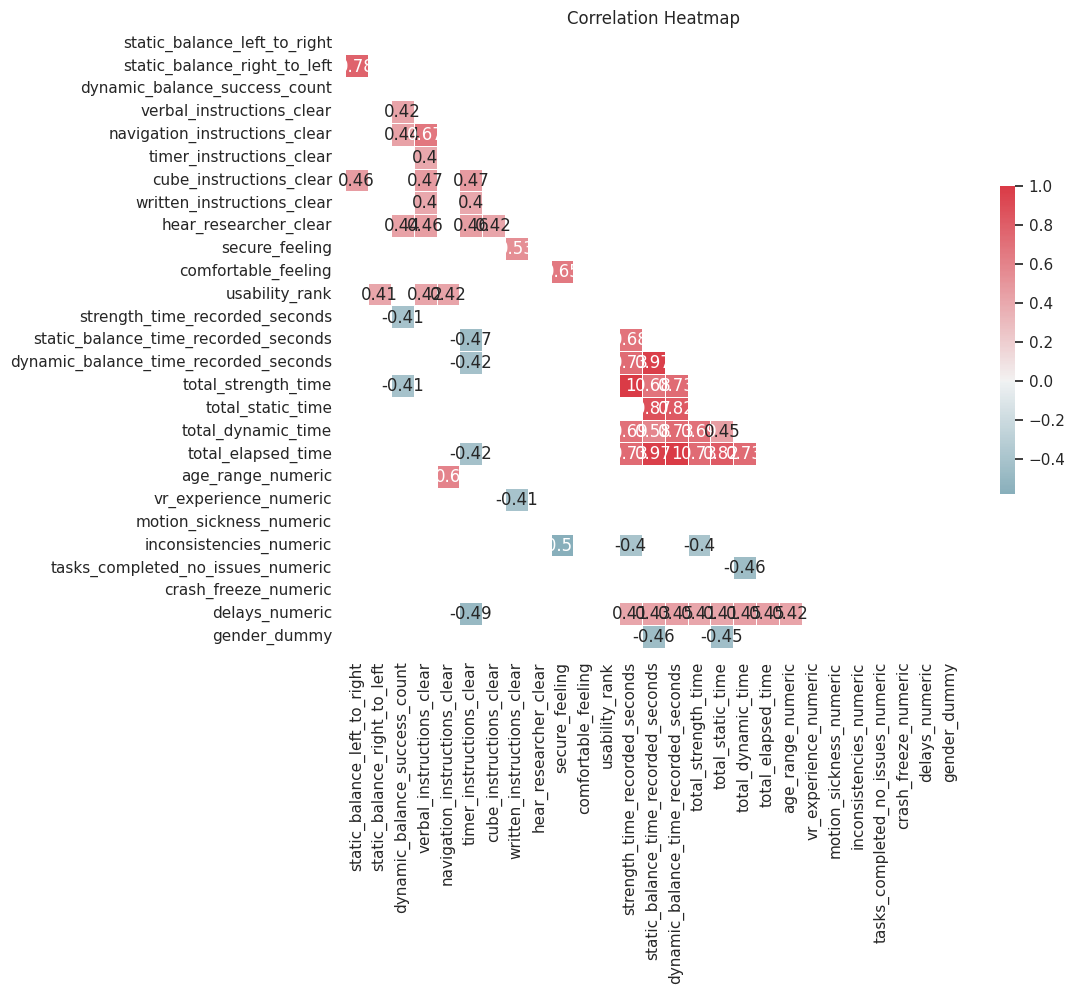

In [54]:
df_corr_ordinal = df.select_dtypes(include=['int64','float64', 'category'])

# Create a new dataframe with only the variables you want to correlate
#cor_df = df[['age_range_numeric', 'static_balance_left_to_right', 'static_balance_right_to_left', 'dynamic_balance_success_count']]

# Calculate Spearman's correlation coefficients and p-values
corr, p_val = spearmanr(df_corr_ordinal)

# Create a new dataframe to store the correlation coefficients and p-values
result_df = pd.DataFrame(corr, columns=df_corr_ordinal.columns, index=df_corr_ordinal.columns)
p_val_df = pd.DataFrame(p_val, columns=df_corr_ordinal.columns, index=df_corr_ordinal.columns)

# Print the correlation dataframe
print("Correlation Coefficients:")
display(result_df)
#for i in result_df:
  #if int(abs(i[1])) >= 0.5:
  #  print(i)

# Print the p-value dataframe
#print("\nP-values:")
#print(p_val_df)

#
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df_corr_ordinal.corr(method='spearman')

# Create a mask to only show the lower triangle of the heatmap

threshold = 0.4
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.abs(corr_matrix) < threshold] = True

# Set up the figure
f, ax = plt.subplots(figsize=(10, 8))

# Create a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title to the plot
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [55]:
# Extract correlation coefficients of age_range_numeric with other variables
age_corr = result_df.loc['age_range', :]

# Remove the correlation coefficient of age_range_numeric with itself
age_corr = age_corr.drop(['age_range_numeric', 'age_range'])

# Check if age_range_numeric is highly correlated with any variable
age_corr = result_df['age_range']
if ( abs(age_corr) >= 0.5).any():
    print("age_range is highly correlated with:")
    highly_corr_vars = age_corr[ abs(age_corr) >= 0.5].index.tolist()
    for var in highly_corr_vars:
        if ((var != 'age_range_numeric') & (var != 'age_range')):
            print('\t',var)
else:
    print("age_range is not highly correlated with any variable.")

## The results of the below suggest that the older adults in this study found the teleportation instructions difficult to follow,
## these results are also noted by the researcher in the qualitative feedback (verbal from the participants, and also the notes taken during the scenario)

age_range is highly correlated with:
	 navigation_instructions_clear


This code defines a function called get_correlation that computes the feature correlation for a dataframe and sorts the feature pairs based on their correlation.

Here's a breakdown of the function:

It takes several parameters:

    df: The dataframe with the predictor variables.
    top_n: The number of top feature pairs to be reported. If set to None, all pairs will be returned.
    corr_method: The correlation computation method. By default, it uses the Spearman correlation.
    remove_duplicates: Indicates whether duplicate features should be removed.
    remove_self_correlations: Indicates whether self-correlations should be removed.
    numeric_only: Indicates whether to consider only numeric columns for correlation calculation.

  It calculates the absolute correlation matrix using the specified correlation method (corr_method) with the corr() method from pandas.

  It reshapes the correlation matrix into a series using unstack().

  It sorts the series of correlation values in descending order.

  If specified (remove_self_correlations), it removes pairs where the same feature is compared.

  If specified (remove_duplicates), it removes duplicate pairs by keeping only one entry for each pair.

  It assigns meaningful column names to the sorted correlated features dataframe.

  If specified (top_n), it returns the top n correlated feature pairs.

  Finally, it returns the sorted correlated features dataframe.



The purpose of this function is to provide a convenient way to compute and analyze feature correlations in a dataframe, allowing for customization and control over the output.

In [56]:
## Function to prepare correlaton coefficients for the variables

def get_correlation(df, top_n=None, corr_method='spearman', remove_duplicates=True, remove_self_correlations=True, numeric_only=False):
  """
  Compute the feature correlation and sort feature pairs based on their correlation
  :param df: The dataframe with the predictor variables
  :type df: pandas.core.frame.DataFrame
  :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
  :param corr_method: Correlation compuation method
  :type corr_method: str
  :param remove_duplicates: Indicates whether duplicate features must be removed
  :type remove_duplicates: bool
  :param remove_self_correlations: Indicates whether self correlations will be removed
  :type remove_self_correlations: bool
  :return: pandas.core.frame.DataFrame
  """
  corr_matrix_abs = df.corr(method=corr_method).abs()
  corr_matrix_abs_us = corr_matrix_abs.unstack()
  sorted_correlated_features = corr_matrix_abs_us \
    .sort_values(kind="quicksort", ascending=False) \
    .reset_index()

  # Remove comparisons of the same feature
  if remove_self_correlations:
    sorted_correlated_features = sorted_correlated_features[
        (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
    ]
  # Remove duplicates
  if remove_duplicates:
    sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]


  # Create meaningful names for the columns
  sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

  if top_n:
    return sorted_correlated_features[:top_n]

  return sorted_correlated_features


The choice of a correlation coefficient cutoff to determine whether there is a significant correlation in your analysis depends on various factors, including the context of your data and the specific field of study. However, there are some commonly used guidelines for interpreting the strength of correlation coefficients:

*0 to 0.2: Very weak correlation
* 0.2 to 0.4: Weak correlation
*0.4 to 0.6: Moderate correlation
*0.6 to 0.8: Strong correlation
*0.8 to 1.0: Very strong correlation

It's important to note that these are general guidelines, and the interpretation of correlation coefficients should always be considered in the context of the specific data and research question. Additionally, the significance of a correlation should be assessed through hypothesis testing, such as calculating p-values.

The choice of correlation coefficient (e.g., Pearson's correlation coefficient, Spearman's rank correlation coefficient, etc.) depends on the type of data and the relationship you are investigating. Pearson's correlation coefficient is commonly used for continuous variables with a linear relationship, while Spearman's rank correlation coefficient is suitable for variables with a monotonic relationship (ordinal or non-linear).

Ultimately, the determination of whether a correlation is meaningful or significant in your analysis should be based on a combination of the correlation coefficient magnitude, the context of the study, and statistical tests to assess significance.

In [57]:
correlation_df = get_correlation(df, top_n=100)
correlation_df.dropna()

print("Top features with moderate to high correlation:")
correlation_df[2:50]

Top features with moderate to high correlation:


<ipython-input-56-701450b0ff9d>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_abs = df.corr(method=corr_method).abs()


,Feature 1,Feature 2,Correlation (abs)
29,dynamic_balance_time_recorded_seconds,static_balance_time_recorded_seconds,0.965550
31,static_balance_time_recorded_seconds,total_elapsed_time,0.965550
33,static_balance_time_recorded_seconds,total_static_time,0.872279
35,dynamic_balance_time_recorded_seconds,total_static_time,0.818410
37,total_elapsed_time,total_static_time,0.818410
39,static_balance_left_to_right,static_balance_right_to_left,0.775409
41,dynamic_balance_time_recorded_seconds,total_dynamic_time,0.733771
43,total_dynamic_time,total_elapsed_time,0.733771
45,total_strength_time,total_elapsed_time,0.731614
47,strength_time_recorded_seconds,total_elapsed_time,0.731614


In [58]:
# Print all rows where Feature 1 or Feature 2 == age_range_numeric
age_range_numeric_rows = correlation_df.loc[(correlation_df['Feature 1'] == 'age_range_numeric') | (correlation_df['Feature 2'] == 'age_range_numeric') ]
print(age_range_numeric_rows)


                         Feature 1                Feature 2  Correlation (abs)
65   navigation_instructions_clear        age_range_numeric           0.596842
113                 delays_numeric        age_range_numeric           0.422173
145      verbal_instructions_clear        age_range_numeric           0.397288
149     written_instructions_clear        age_range_numeric           0.390509
179              age_range_numeric           secure_feeling           0.351190
193             total_dynamic_time        age_range_numeric           0.342211
203              age_range_numeric  cube_instructions_clear           0.329702


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_correlation_true(df, top_n=None, corr_method='spearman', remove_duplicates=True, remove_self_correlations=True, threshold=0.3):
    """
    Compute the feature correlation and sort feature pairs based on their correlation
    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method (default is 'spearman' for Spearman correlation)
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool
    :return: pandas.core.frame.DataFrame
    """
    corr_matrix = df.corr(method=corr_method)
    corr_matrix_us = corr_matrix.unstack().reset_index()

    # Remove self correlations
    if remove_self_correlations:
        corr_matrix_us = corr_matrix_us[corr_matrix_us['level_0'] != corr_matrix_us['level_1']]

    # Remove duplicates
    if remove_duplicates:
        corr_matrix_us = corr_matrix_us.iloc[:-2:2]


    # Exclude features with correlation coefficient of 1.0
    corr_matrix_us = corr_matrix_us[corr_matrix_us['level_1'] != 1.0]

    # Create meaningful names for the columns
    corr_matrix_us.columns = ['Feature 1', 'Feature 2', 'Correlation']

    if top_n:
        sorted_correlated_features = corr_matrix_us.sort_values('Correlation', ascending=False)[:top_n]
    else:
        sorted_correlated_features = corr_matrix_us.sort_values('Correlation', ascending=False)


    # Create a custom colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Create the correlation heatmap with mask
    correlation_matrix = df.corr(method=corr_method)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    correlation_matrix = correlation_matrix.mask(np.abs(correlation_matrix) < threshold)
    correlation_matrix = correlation_matrix.mask(mask)

    plt.figure(figsize=(10, 8))  # Adjust the figsize as per your preference
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0, fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 8, "color": "black"})
    plt.title('Correlation Heatmap')
    plt.show()

    # Apply threshold to correlation matrix
    correlation_matrix = correlation_matrix.mask(np.abs(correlation_matrix) < threshold)

    return sorted_correlated_features




<ipython-input-59-c161d7cef14e>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method=corr_method)
<ipython-input-59-c161d7cef14e>:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method=corr_method)


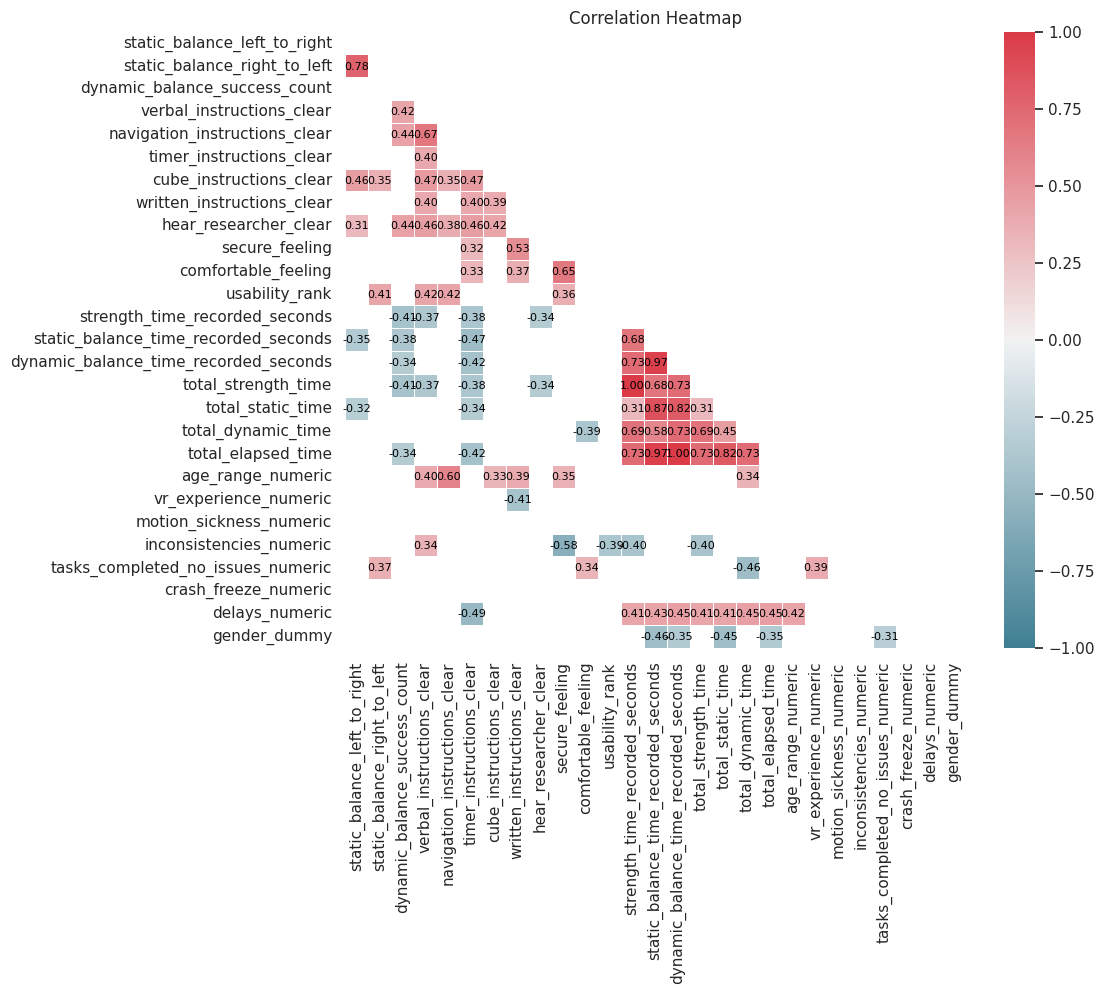

,Feature 1,Feature 2,Correlation
339,strength_time_recorded_seconds,total_strength_time,1.000000
500,total_elapsed_time,dynamic_balance_time_recorded_seconds,1.000000
417,total_strength_time,strength_time_recorded_seconds,1.000000
502,total_elapsed_time,total_static_time,0.818410
446,total_static_time,dynamic_balance_time_recorded_seconds,0.818410
...,...,...,...
706,gender_dummy,navigation_instructions_clear,0.172566
710,gender_dummy,hear_researcher_clear,0.166667
227,hear_researcher_clear,usability_rank,0.163970
305,usability_rank,hear_researcher_clear,0.163970


In [60]:
true_corr = get_correlation_true(df, top_n=100)
true_corr

In [61]:
# Print all rows where Coeff < 0
#true_rows = true_corr.loc[(true_corr['Correlation'] < -0.3 ) | (true_corr['Correlation'] > 0.3) ]
true_rows = true_corr.loc[(true_corr['Correlation'] < 0 ) ]
true_rows


,Feature 1,Feature 2,Correlation


In [62]:
df.total_elapsed_time.sum()

4130